# WeRateDogs Twitter Project

In [1]:
#import libraries
import tweepy
from tweepy import OAuthHandler
import json
import os
import requests
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

## Gathering Data

In [2]:
#Read the twitter-archive-enhanced.csv file
archive_df = pd.read_csv('twitter-archive-enhanced.csv')
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [3]:
#Programatically download files from the internet
#Create folder if it does not exist already
folder_name = 'image_predictions'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)
    
url = 'https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
    
response = requests.get(url)
response

<Response [200]>

In [4]:
#open tsv file
with open('image_predictions.tsv', 'wb') as file:
    file.write(response.content)

#Read tsv file   
image_df = pd.read_csv('image_predictions.tsv', sep='\t')
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [5]:
#Get data by querying Twitter API

consumer_key = ''
consumer_secret = ''
access_token = ''
access_secret = ''

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth, parser = tweepy.parsers.JSONParser(), wait_on_rate_limit = True, wait_on_rate_limit_notify = True)

In [6]:
# Store results in a list dictionaries
df_list = []
# Store errors of the tweet_iderrors
error_list = []

tweet_id = archive_df['tweet_id']

# Get the tweet object for all the teweets in archive dataframe 
for tweet in tweet_id:
    try:
        tweet_page = api.get_status(tweet, tweet_mode = 'extended')
        
        favorites = tweet_page['favorite_count']
        retweets = tweet_page['retweet_count']
        day_time = pd.to_datetime(tweet_page['created_at'])
        
        df_list.append({'tweet_id': int(tweet),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        
    except Exception as e:
        print(str(tweet)+ " _ " + str(e))
        error_list.append(tweet)

888202515573088257 _ [{'code': 144, 'message': 'No status found with that ID.'}]
873697596434513921 _ [{'code': 144, 'message': 'No status found with that ID.'}]
869988702071779329 _ [{'code': 144, 'message': 'No status found with that ID.'}]
866816280283807744 _ [{'code': 144, 'message': 'No status found with that ID.'}]
861769973181624320 _ [{'code': 144, 'message': 'No status found with that ID.'}]
845459076796616705 _ [{'code': 144, 'message': 'No status found with that ID.'}]
842892208864923648 _ [{'code': 144, 'message': 'No status found with that ID.'}]
837012587749474308 _ [{'code': 144, 'message': 'No status found with that ID.'}]
827228250799742977 _ [{'code': 144, 'message': 'No status found with that ID.'}]
802247111496568832 _ [{'code': 144, 'message': 'No status found with that ID.'}]
775096608509886464 _ [{'code': 144, 'message': 'No status found with that ID.'}]
Rate limit reached. Sleeping for: 714
Rate limit reached. Sleeping for: 718


In [7]:
error_list

[888202515573088257,
 873697596434513921,
 869988702071779329,
 866816280283807744,
 861769973181624320,
 845459076796616705,
 842892208864923648,
 837012587749474308,
 827228250799742977,
 802247111496568832,
 775096608509886464]

In [8]:
#Return number of the result
print("The number of the result returned", len(df_list))
#Return of the errors
print("The number of errors returned", len(error_list))

The number of the result returned 2345
The number of errors returned 11


In [9]:
#Repeat process for errors
ee_list = []
for e in error_list:
    try:
        favorites = tweet_page['favorite_count']
        retweets = tweet_page['retweet_count']
        date_time = tweet_page['created_at']
        
        df_list.append({'tweet_id': int(tweet),
                        'favorites': int(favorites),
                        'retweets': int(retweets)})
        
    except Exception:
        print(str(tweet_id)+ " _ " + str(e))
        ee_list.append(e)

In [10]:
#The 11 errors are now saved into the list and this is the number of result
len(df_list)

2356

In [11]:
# Create DataFrames from list of dictionaries
tweet_df = pd.DataFrame(df_list, columns = ['tweet_id', 'favorites', 'retweets'])

# Save the dataFrame in file
tweet_df.to_csv('tweet_json.txt', encoding = 'utf-8', index=False)

In [12]:
# Read the saved tweet_json.txt file into a dataframe
tweet_df = pd.read_csv('tweet_json.txt', encoding = 'utf-8')
tweet_df

,tweet_id,favorites,retweets
0,892420643555336193,38915,8627
1,892177421306343426,33326,6336
2,891815181378084864,25102,4207
3,891689557279858688,42268,8745
4,891327558926688256,40427,9507
5,891087950875897856,20275,3150
6,890971913173991426,11890,2099
7,890729181411237888,65756,19118
8,890609185150312448,27854,4316
9,890240255349198849,32040,7503


In [13]:
tweet_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id     2356 non-null int64
favorites    2356 non-null int64
retweets     2356 non-null int64
dtypes: int64(3)
memory usage: 55.3 KB


# Assess

In [14]:
archive_df

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None,None,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None,None,None,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None,None,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None,None,None,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,None,None,None


In [15]:
archive_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
doggo                         2356 non-null object
floofer                       2356 non-null object
pupper                        2356 non-null object
puppo                         2356 non-null object
dtypes: float64(4), int64(3), ob

In [16]:
image_df

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese_mountain_dog,0.651137,True,English_springer,0.263788,True,Greater_Swiss_Mountain_dog,0.016199,True
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,box_turtle,0.933012,False,mud_turtle,0.045885,False,terrapin,0.017885,False
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,chow,0.692517,True,Tibetan_mastiff,0.058279,True,fur_coat,0.054449,False
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,shopping_cart,0.962465,False,shopping_basket,0.014594,False,golden_retriever,0.007959,True
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,miniature_poodle,0.201493,True,komondor,0.192305,True,soft-coated_wheaten_terrier,0.082086,True


In [17]:
image_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
tweet_id    2075 non-null int64
jpg_url     2075 non-null object
img_num     2075 non-null int64
p1          2075 non-null object
p1_conf     2075 non-null float64
p1_dog      2075 non-null bool
p2          2075 non-null object
p2_conf     2075 non-null float64
p2_dog      2075 non-null bool
p3          2075 non-null object
p3_conf     2075 non-null float64
p3_dog      2075 non-null bool
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [18]:
#Sort names alphabetically. Lowercase names appears at the bottom
archive_df.name.sort_values()

1035            Abby
1021            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
875           Albert
1954          Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
661            Alfie
367            Alfie
1616           Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
852               my
988              not
335              not
1747      officially
1206             old
993              one
1936             one
924              one
369              one
2326           quite
169            quite
118            quite
193            quite
2030           space
22              such
2345             the
2346         

In [19]:
archive_df['name'].value_counts()

None        745
a            55
Charlie      12
Lucy         11
Cooper       11
Oliver       11
Tucker       10
Penny        10
Lola         10
Bo            9
Winston       9
the           8
Sadie         8
Bailey        7
Toby          7
Daisy         7
Buddy         7
an            7
Dave          6
Leo           6
Milo          6
Oscar         6
Jack          6
Jax           6
Stanley       6
Koda          6
Rusty         6
Bella         6
Scout         6
Gus           5
           ... 
Kloey         1
Tino          1
Taco          1
Venti         1
Zara          1
Tayzie        1
Vince         1
Benny         1
Caryl         1
Rodman        1
Lacy          1
Kulet         1
Tebow         1
Cupid         1
Willy         1
Shawwn        1
Ralphy        1
Jomathan      1
Katie         1
Josep         1
Thor          1
Willie        1
Arlo          1
Milky         1
Kody          1
Malikai       1
Aldrick       1
Meera         1
Mojo          1
Gabby         1
Name: name, Length: 957,

In [20]:
#View rows where name is lowercase which in actual fact is not a name
archive_df.loc[(archive_df['name'].str.islower())]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
22,887517139158093824,NaN,NaN,2017-07-19 03:39:09 +0000,"<a href=""http://twitter.com/download/iphone"" r...",I've yet to rate a Venezuelan Hover Wiener. Th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/887517139...,14,10,such,None,None,None,None
56,881536004380872706,NaN,NaN,2017-07-02 15:32:16 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a pupper approaching maximum borkdrive...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/881536004...,14,10,a,None,None,pupper,None
118,869988702071779329,NaN,NaN,2017-05-31 18:47:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: We only rate dogs. This is quit...,8.591970e+17,4.196984e+09,2017-05-02 00:04:57 +0000,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
169,859196978902773760,NaN,NaN,2017-05-02 00:04:57 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. This is quite clearly a smo...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/859196978...,12,10,quite,None,None,None,None
193,855459453768019968,NaN,NaN,2017-04-21 16:33:22 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Guys, we only rate dogs. This is quite clearly...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/855459453...,12,10,quite,None,None,None,None
335,832645525019123713,NaN,NaN,2017-02-17 17:38:57 +0000,"<a href=""http://twitter.com"" rel=""nofollow"">Tw...",There's going to be a dog terminal at JFK Airp...,NaN,NaN,NaN,http://us.blastingnews.com/news/2017/02/jfk-an...,10,10,not,None,None,None,None
369,828650029636317184,NaN,NaN,2017-02-06 17:02:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...","Occasionally, we're sent fantastic stories. Th...",NaN,NaN,NaN,https://twitter.com/dog_rates/status/828650029...,14,10,one,None,None,None,None
542,806219024703037440,NaN,NaN,2016-12-06 19:29:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",We only rate dogs. Please stop sending in non-...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/806219024...,11,10,incredibly,None,None,None,None
649,792913359805018113,NaN,NaN,2016-10-31 02:17:31 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a perfect example of someone who has t...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/792913359...,13,10,a,None,None,None,None
682,788552643979468800,NaN,NaN,2016-10-19 01:29:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Say hello to mad pupper. You kn...,7.363926e+17,4.196984e+09,2016-05-28 03:04:00 +0000,"https://vine.co/v/iEggaEOiLO3,https://vine.co/...",13,10,mad,None,None,pupper,None


In [21]:
archive_df.rating_denominator.value_counts()

10     2333
11        3
50        3
80        2
20        2
2         1
16        1
40        1
70        1
15        1
90        1
110       1
120       1
130       1
150       1
170       1
7         1
0         1
Name: rating_denominator, dtype: int64

In [22]:
#Show the duplicated images
image_df[image_df.duplicated(['jpg_url'], keep=False)]

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
85,667509364010450944,https://pbs.twimg.com/media/CUN4Or5UAAAa5K4.jpg,1,beagle,0.636169,True,Labrador_retriever,0.119256,True,golden_retriever,0.082549,True
224,670319130621435904,https://pbs.twimg.com/media/CU1zsMSUAAAS0qW.jpg,1,Irish_terrier,0.254856,True,briard,0.227716,True,soft-coated_wheaten_terrier,0.223263,True
241,670444955656130560,https://pbs.twimg.com/media/CU3mITUWIAAfyQS.jpg,1,English_springer,0.403698,True,Brittany_spaniel,0.347609,True,Welsh_springer_spaniel,0.137186,True
327,671896809300709376,https://pbs.twimg.com/media/CVMOlMiWwAA4Yxl.jpg,1,chow,0.243529,True,hamster,0.227150,False,Pomeranian,0.056057,True
382,673320132811366400,https://pbs.twimg.com/media/CVgdFjNWEAAxmbq.jpg,3,Samoyed,0.978833,True,Pomeranian,0.012763,True,Eskimo_dog,0.001853,True
432,674291837063053312,https://pbs.twimg.com/media/CVuQ2LeUsAAIe3s.jpg,1,Cardigan,0.611525,True,Pembroke,0.368566,True,Chihuahua,0.003330,True
480,675354435921575936,https://pbs.twimg.com/ext_tw_video_thumb/67535...,1,upright,0.303415,False,golden_retriever,0.181351,True,Brittany_spaniel,0.162084,True
487,675501075957489664,https://pbs.twimg.com/media/CV_cnjHWUAADc-c.jpg,1,dough,0.806757,False,bakery,0.027907,False,French_loaf,0.018189,False
587,679062614270468097,https://pbs.twimg.com/media/CWyD2HGUYAQ1Xa7.jpg,2,cash_machine,0.802333,False,schipperke,0.045519,True,German_shepherd,0.023353,True
591,679158373988876288,https://pbs.twimg.com/media/CWza7kpWcAAdYLc.jpg,1,pug,0.272205,True,bull_mastiff,0.251530,True,bath_towel,0.116806,False


In [23]:
#Show the duplicated tweet_id
tweet_df[tweet_df.duplicated(['tweet_id'], keep=False)]

,tweet_id,favorites,retweets
2344,666020888022790149,2561,520
2345,666020888022790149,2561,520
2346,666020888022790149,2561,520
2347,666020888022790149,2561,520
2348,666020888022790149,2561,520
2349,666020888022790149,2561,520
2350,666020888022790149,2561,520
2351,666020888022790149,2561,520
2352,666020888022790149,2561,520
2353,666020888022790149,2561,520


### Quality

The name column has a lot of non-name values. Names like 'a', 'an', 'incredibly' are names at all. There are also 745 missing names.

Empty columns include in_reply_to_status_id, in_reply_to_user_id, retweeted_status_id, retweeted_status_user_id, retweeted_status_timestamp.

expanded_urls column contains some missing images which we will have to remove those rows

Rating numerator and denominator contains some invalid values so should be converted to a float to account for decimals

Dataset contains retweets. We only want original ratings (no retweets) that have images

Some columns that have null objects are non-null

Some tweet_ids have the same jpg_url and has been duplicated 132 times

tweet_id 666020888022790149 is duplicated 12 times

image_df columns p1, p2, and p3 contain underscores _ in some names

### Tidiness

Columns 'retweeted_status_id' 'retweeted_status_user_id' and 'retweeted_status_timestamp' are not useful after we get rid of retweets.

Columns 'doggo', 'floofer', 'pupper', and 'puppo' should show one variable.

Columns 'rating_numerator' and 'rating_denominator' should show one variable

tweet_df and image_df should be part of archive_df.

tweet_id column needs to be converted from an 'int' type to a 'str' object type for consistency across all dataframes

The columns for the different types of dog breeds can be merged together



# Clean

In [24]:
#Create clean copies dataframes to work off the originals 
archive_df_clean = archive_df.copy()
image_df_clean = image_df.copy()
tweet_df_clean = tweet_df.copy()

## archive_df_clean dataframe

#### Define

Replace mispelled names with none or correct ones

#### Code

In [25]:
#Finds all names that our lowercase and replacing names with None
archive_df_clean.loc[archive_df_clean.name.str.islower(),'name'] = 'None'

#O'Malley is the odd one out to replace
archive_df_clean['name'].replace("O","O'Malley", inplace=True)

#### Test

In [26]:
archive_df_clean.name.sort_values()

1021            Abby
1035            Abby
938              Ace
1933            Acro
1327           Adele
1934           Aiden
77               Aja
480            Akumi
820               Al
1954          Albert
875           Albert
144            Albus
412            Albus
1115         Aldrick
2046       Alejandro
374        Alexander
1189    Alexanderson
486              Alf
2238           Alfie
1616           Alfie
661            Alfie
367            Alfie
858            Alfie
51              Alfy
201            Alice
1701           Alice
1495           Amber
1334         Ambrose
2078             Amy
2195          Amélie
            ...     
280          Winston
559          Winston
407          Winston
986          Winston
1243         Winston
816          Winston
2133         Winston
171          Winston
1829         Winston
877           Wishes
410            Wyatt
1451           Wyatt
174            Wyatt
1378            Yoda
622             Yogi
43              Yogi
1409         

#### Define

Combine 'doggo', 'floofer', 'pupper', and 'puppo' into one column called 'dog_stage'

#### Code

In [27]:
archive_df_clean['dog_type'] = archive_df[['doggo','floofer','pupper','puppo']].apply(lambda x: ''.join(x), axis=1)

archive_df_clean['dog_type'].replace("NoneNoneNoneNone","None", inplace=True)
archive_df_clean['dog_type'].replace("doggoNoneNoneNone","doggo", inplace=True)
archive_df_clean['dog_type'].replace("NoneflooferNoneNone","floofer", inplace=True)
archive_df_clean['dog_type'].replace("NoneNonepupperNone","pupper", inplace=True)
archive_df_clean['dog_type'].replace("NoneNoneNonepuppo","puppo", inplace=True)
archive_df_clean['dog_type'].replace("doggoflooferNoneNone","doggo_floofer", inplace=True)
archive_df_clean['dog_type'].replace("doggoNonepupperNone","doggo_pupper", inplace=True)
archive_df_clean['dog_type'].replace("doggoNoneNonepuppo","doggo_puppo", inplace=True)

#Drop 4 column we do not need anymore 
columns = ['doggo', 'floofer', 'pupper', 'puppo']
archive_df_clean = archive_df_clean.drop(columns, axis=1)

#### Test

In [28]:
archive_df_clean

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,None
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,None
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,None
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,None
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo


In [29]:
#We noticed that there were column that had more than one type so we put in a new text called 'Multiples'
archive_df_clean['dog_type'].value_counts()

None             1976
pupper            245
doggo              83
puppo              29
doggo_pupper       12
floofer             9
doggo_puppo         1
doggo_floofer       1
Name: dog_type, dtype: int64

#### Define

Delete rows that have retweet status since we need to identify the original tweets and not the retweets

#### Code

In [30]:
#We see 181 rows of retweet and needs to be removed
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2356 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2356 non-null object
source                        2356 non-null object
text                          2356 non-null object
retweeted_status_id           181 non-null float64
retweeted_status_user_id      181 non-null float64
retweeted_status_timestamp    181 non-null object
expanded_urls                 2297 non-null object
rating_numerator              2356 non-null int64
rating_denominator            2356 non-null int64
name                          2356 non-null object
dog_type                      2356 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 257.8+ KB


In [31]:
#Identify the retweets
archive_df_clean[archive_df_clean['retweeted_status_id'].notnull()==True]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,dog_type
19,888202515573088257,NaN,NaN,2017-07-21 01:02:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Canela. She attempted s...,8.874740e+17,4.196984e+09,2017-07-19 00:47:34 +0000,https://twitter.com/dog_rates/status/887473957...,13,10,Canela,None
32,886054160059072513,NaN,NaN,2017-07-15 02:45:48 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Athletics: 12/10 #BATP https://t.co/WxwJmv...,8.860537e+17,1.960740e+07,2017-07-15 02:44:07 +0000,https://twitter.com/dog_rates/status/886053434...,12,10,None,None
36,885311592912609280,NaN,NaN,2017-07-13 01:35:06 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Lilly. She just paralle...,8.305833e+17,4.196984e+09,2017-02-12 01:04:29 +0000,https://twitter.com/dog_rates/status/830583320...,13,10,Lilly,None
68,879130579576475649,NaN,NaN,2017-06-26 00:13:58 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Emmy. She was adopted t...,8.780576e+17,4.196984e+09,2017-06-23 01:10:23 +0000,https://twitter.com/dog_rates/status/878057613...,14,10,Emmy,None
73,878404777348136964,NaN,NaN,2017-06-24 00:09:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Shadow. In an attempt to r...,8.782815e+17,4.196984e+09,2017-06-23 16:00:04 +0000,"https://www.gofundme.com/3yd6y1c,https://twitt...",13,10,Shadow,None
74,878316110768087041,NaN,NaN,2017-06-23 18:17:33 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: Meet Terrance. He's being yelle...,6.690004e+17,4.196984e+09,2015-11-24 03:51:38 +0000,https://twitter.com/dog_rates/status/669000397...,11,10,Terrance,None
78,877611172832227328,NaN,NaN,2017-06-21 19:36:23 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @rachel2195: @dog_rates the boyfriend and h...,8.768508e+17,5.128045e+08,2017-06-19 17:14:49 +0000,https://twitter.com/rachel2195/status/87685077...,14,10,None,pupper
91,874434818259525634,NaN,NaN,2017-06-13 01:14:41 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Coco. At first I though...,8.663350e+17,4.196984e+09,2017-05-21 16:48:45 +0000,https://twitter.com/dog_rates/status/866334964...,12,10,Coco,None
95,873697596434513921,NaN,NaN,2017-06-11 00:25:14 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Walter. He won't start ...,8.688804e+17,4.196984e+09,2017-05-28 17:23:24 +0000,https://twitter.com/dog_rates/status/868880397...,14,10,Walter,None
97,873337748698140672,NaN,NaN,2017-06-10 00:35:19 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @dog_rates: This is Sierra. She's one preci...,8.732138e+17,4.196984e+09,2017-06-09 16:22:42 +0000,https://www.gofundme.com/help-my-baby-sierra-g...,12,10,Sierra,pupper


In [32]:
#Drop rows
archive_df_clean.drop(archive_df_clean[archive_df_clean['retweeted_status_id'].notnull()== True].index,inplace=True)

#### Test

In [33]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2175 non-null int64
in_reply_to_status_id         78 non-null float64
in_reply_to_user_id           78 non-null float64
timestamp                     2175 non-null object
source                        2175 non-null object
text                          2175 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2175 non-null int64
rating_denominator            2175 non-null int64
name                          2175 non-null object
dog_type                      2175 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 254.9+ KB


#### Define

Remove the rows where there are no images in expanded_url

#### Code

In [34]:
archive_df_clean = archive_df_clean.dropna(subset=['expanded_urls'])

#### Test

In [35]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 14 columns):
tweet_id                      2117 non-null int64
in_reply_to_status_id         23 non-null float64
in_reply_to_user_id           23 non-null float64
timestamp                     2117 non-null object
source                        2117 non-null object
text                          2117 non-null object
retweeted_status_id           0 non-null float64
retweeted_status_user_id      0 non-null float64
retweeted_status_timestamp    0 non-null object
expanded_urls                 2117 non-null object
rating_numerator              2117 non-null int64
rating_denominator            2117 non-null int64
name                          2117 non-null object
dog_type                      2117 non-null object
dtypes: float64(4), int64(3), object(7)
memory usage: 248.1+ KB


#### Define

Remove all unwanted retweet and reply columns

#### Code

In [36]:
archive_df_clean.drop(['retweeted_status_user_id',
                       'retweeted_status_id',
                       'retweeted_status_timestamp',
                       'in_reply_to_status_id',
                       'in_reply_to_user_id',
                       'in_reply_to_status_id'], axis=1,inplace=True)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  


#### Test

In [37]:
archive_df_clean.head()

,tweet_id,timestamp,source,text,expanded_urls,rating_numerator,rating_denominator,name,dog_type
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None


#### Define

Convert rating_numerator and rating_denominator into one variable

#### Code

In [38]:
archive_df_clean['rating']=archive_df_clean.rating_numerator/archive_df_clean.rating_denominator
archive_df_clean=archive_df_clean.drop(['rating_numerator','rating_denominator'],axis=1)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


#### Test

In [39]:
archive_df_clean.rating.sort_values()

315       0.000000
1016      0.000000
2091      0.100000
2261      0.100000
1869      0.100000
2338      0.100000
1920      0.200000
1764      0.200000
2237      0.200000
2310      0.200000
1761      0.200000
2326      0.200000
2246      0.200000
2079      0.200000
2349      0.200000
1165      0.200000
1189      0.300000
2136      0.300000
1692      0.300000
2239      0.300000
1836      0.300000
1601      0.300000
1898      0.300000
1947      0.300000
2202      0.300000
2305      0.300000
765       0.300000
2334      0.300000
2183      0.300000
1928      0.300000
           ...    
449       1.400000
448       1.400000
924       1.400000
41        1.400000
533       1.400000
436       1.400000
426       1.400000
35        1.400000
866       1.400000
76        1.400000
657       1.400000
123       1.400000
404       1.400000
184       1.400000
490       1.400000
117       1.400000
395       1.400000
788       1.400000
110       1.400000
418       1.400000
22        1.400000
758       1.

#### Define

We need to convert tweet_id to 'str' object value and the rating columns to a float type

#### Code

In [40]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2117 non-null int64
timestamp        2117 non-null object
source           2117 non-null object
text             2117 non-null object
expanded_urls    2117 non-null object
name             2117 non-null object
dog_type         2117 non-null object
rating           2117 non-null float64
dtypes: float64(1), int64(1), object(6)
memory usage: 148.9+ KB


In [41]:
archive_df_clean.tweet_id = archive_df_clean.tweet_id.astype(str)
archive_df_clean['rating'] = archive_df_clean['rating'].astype(float)

In [42]:
archive_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 8 columns):
tweet_id         2117 non-null object
timestamp        2117 non-null object
source           2117 non-null object
text             2117 non-null object
expanded_urls    2117 non-null object
name             2117 non-null object
dog_type         2117 non-null object
rating           2117 non-null float64
dtypes: float64(1), object(7)
memory usage: 148.9+ KB


## image_df_clean dataframe

#### Define

Fix underscore in p1, p2, and p3 columns and capitalize those titles to make it consistent

#### Code

In [43]:
#Replaces underscores with blanks and replace all names with capitalized titles
p_columns = ['p1', 'p2', 'p3']
for p in p_columns:
    image_df_clean[p] = image_df_clean[p].str.replace('_', ' ')
    image_df_clean[p] = image_df_clean[p].str.title()

#### Test

In [44]:
image_df_clean.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074,True,Collie,0.156665,True,Shetland Sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826,True,Miniature Pinscher,0.074192,True,Rhodesian Ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461,True,Malinois,0.138584,True,Bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143,True,Redbone,0.360687,True,Miniature Pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


#### Define 

Condesing the different dog breed and confidence columns

#### Code

In [45]:
breed = []
conf= []

def breed_conf(row):
    if row['p1_dog']:
        breed.append(row['p1'])
        conf.append(row['p1_conf'])
    elif row['p2_dog']:
        breed.append(row['p2'])
        conf.append(row['p2_conf'])
    elif row['p3_dog']:
        breed.append(row['p3'])
        conf.append(row['p3_conf'])
    else:
        breed.append('Unknown')
        conf.append(0)

image_df_clean.apply(breed_conf, axis = 1)

image_df_clean['breed'] = breed
image_df_clean['confidence'] = conf

In [46]:
#Drop columns
image_df_clean.drop(['p1', 'p1_conf', 'p1_dog', 'p2', 'p2_conf', 'p2_dog', 'p3', 'p3_conf', 'p3_dog',], axis=1, inplace=True)

#### Test 

In [47]:
image_df_clean

,tweet_id,jpg_url,img_num,breed,confidence
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh Springer Spaniel,0.465074
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,Redbone,0.506826
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German Shepherd,0.596461
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian Ridgeback,0.408143
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,Miniature Pinscher,0.560311
5,666050758794694657,https://pbs.twimg.com/media/CT5Jof1WUAEuVxN.jpg,1,Bernese Mountain Dog,0.651137
6,666051853826850816,https://pbs.twimg.com/media/CT5KoJ1WoAAJash.jpg,1,Unknown,0.000000
7,666055525042405380,https://pbs.twimg.com/media/CT5N9tpXIAAifs1.jpg,1,Chow,0.692517
8,666057090499244032,https://pbs.twimg.com/media/CT5PY90WoAAQGLo.jpg,1,Golden Retriever,0.007959
9,666058600524156928,https://pbs.twimg.com/media/CT5Qw94XAAA_2dP.jpg,1,Miniature Poodle,0.201493


#### Define 

We need to convert tweet_id to 'str' object value in the image_df dataframe

#### Code

In [48]:
image_df_clean.tweet_id = image_df_clean.tweet_id.astype(str)

#### Test

In [49]:
image_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 5 columns):
tweet_id      2075 non-null object
jpg_url       2075 non-null object
img_num       2075 non-null int64
breed         2075 non-null object
confidence    2075 non-null float64
dtypes: float64(1), int64(1), object(3)
memory usage: 81.1+ KB


## tweet_df_dataframe

#### Define

We need to convert tweet_id to 'str' object value in the tweet_df dataframe

#### Code

In [50]:
tweet_df_clean.tweet_id = tweet_df_clean.tweet_id.astype(str)

#### Test

In [51]:
tweet_df_clean.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 3 columns):
tweet_id     2356 non-null object
favorites    2356 non-null int64
retweets     2356 non-null int64
dtypes: int64(2), object(1)
memory usage: 55.3+ KB


#### Define

Combine all 3 datasets into one

#### Code

In [52]:
df_merge = pd.merge(archive_df_clean, tweet_df_clean, on = 'tweet_id', how = 'inner')

In [53]:
df_merge = pd.merge(df_merge, image_df_clean, on = 'tweet_id', how = 'inner')

#### Test

In [54]:
df_merge

,tweet_id,timestamp,source,text,expanded_urls,name,dog_type,rating,favorites,retweets,jpg_url,img_num,breed,confidence
0,892420643555336193,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,None,1.3,38915,8627,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1,Unknown,0.000000
1,892177421306343426,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,None,1.3,33326,6336,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581
2,891815181378084864,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,None,1.2,25102,4207,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012
3,891689557279858688,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,None,1.3,42268,8745,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,Labrador Retriever,0.168086
4,891327558926688256,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,None,1.2,40427,9507,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,Basset,0.555712
5,891087950875897856,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,https://twitter.com/dog_rates/status/891087950...,None,None,1.3,20275,3150,https://pbs.twimg.com/media/DF3HwyEWsAABqE6.jpg,1,Chesapeake Bay Retriever,0.425595
6,890971913173991426,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",Jax,None,1.3,11890,2099,https://pbs.twimg.com/media/DF1eOmZXUAALUcq.jpg,1,Appenzeller,0.341703
7,890729181411237888,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,https://twitter.com/dog_rates/status/890729181...,None,None,1.3,65756,19118,https://pbs.twimg.com/media/DFyBahAVwAAhUTd.jpg,2,Pomeranian,0.566142
8,890609185150312448,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,https://twitter.com/dog_rates/status/890609185...,Zoey,None,1.3,27854,4316,https://pbs.twimg.com/media/DFwUU__XcAEpyXI.jpg,1,Irish Terrier,0.487574
9,890240255349198849,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,https://twitter.com/dog_rates/status/890240255...,Cassie,doggo,1.4,32040,7503,https://pbs.twimg.com/media/DFrEyVuW0AAO3t9.jpg,1,Pembroke,0.511319


# Store, Analyze, and Visualize Data

In [55]:
# Save to a file
folder_name = 'Final_Data'
if not os.path.exists(folder_name):
    os.makedirs(folder_name)

# Store the merge dataframe in a CSV file
archive_df_clean.to_csv('Final_Data/twitter_archive_master.csv')
image_df_clean.to_csv('Final_Data/image_prediction_master.csv')
tweet_df_clean.to_csv('Final_Data/tweet_query_master.csv')
df_merge.to_csv('Final_Data/merged_master.csv')

In [57]:
df_master = pd.read_csv('Final_Data/merged_master.csv')
df_master.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2005 entries, 0 to 2004
Data columns (total 15 columns):
Unnamed: 0       2005 non-null int64
tweet_id         2005 non-null int64
timestamp        2005 non-null object
source           2005 non-null object
text             2005 non-null object
expanded_urls    2005 non-null object
name             2005 non-null object
dog_type         2005 non-null object
rating           2005 non-null float64
favorites        2005 non-null int64
retweets         2005 non-null int64
jpg_url          2005 non-null object
img_num          2005 non-null int64
breed            2005 non-null object
confidence       2005 non-null float64
dtypes: float64(2), int64(5), object(8)
memory usage: 235.0+ KB


In [58]:
df_master.describe()

,Unnamed: 0,tweet_id,rating,favorites,retweets,img_num,confidence
count,2005.000000,2.005000e+03,2005.000000,2005.000000,2005.000000,2005.000000,2005.000000
mean,1002.000000,7.354677e+17,1.167223,8840.170075,2715.690773,1.201995,0.464991
std,578.937964,6.749020e+16,4.055985,12573.050428,4698.676533,0.559437,0.338537
min,0.000000,6.660209e+17,0.000000,80.000000,13.000000,1.000000,0.000000
25%,501.000000,6.757066e+17,1.000000,1971.000000,603.000000,1.000000,0.142288
50%,1002.000000,7.081195e+17,1.100000,4002.000000,1309.000000,1.000000,0.461172
75%,1503.000000,7.873224e+17,1.200000,11105.000000,3119.000000,1.000000,0.774792
max,2004.000000,8.924206e+17,177.600000,143784.000000,77607.000000,4.000000,0.999956


Mean rating for a dog is 12.26 with an outlier of 1776 out of 10

Mean retweets for a dog is 2717 with a maximum of 77630

Mean favorites is 8842 with a maximum of 143834


## Dog Type Ratings

/opt/conda/lib/python3.6/site-packages/numpy/core/fromnumeric.py:57: FutureWarning: reshape is deprecated and will raise in a subsequent release. Please use .values.reshape(...) instead
  return getattr(obj, method)(*args, **kwds)


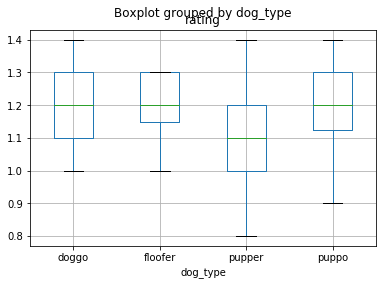

In [59]:
#Create a boxplot and exclude out dog types with None or multiples
df_master.loc[df_master['dog_type'] == 'None', 'dog_type'] = None 
df_master.loc[df_master['dog_type'] == 'doggo_floofer', 'dog_type'] = None
df_master.loc[df_master['dog_type'] == 'doggo_pupper', 'dog_type'] = None
df_master.loc[df_master['dog_type'] == 'doggo_puppo', 'dog_type'] = None

df_master.boxplot(column='rating', by='dog_type', sym='');

In [60]:
df_master.groupby('dog_type')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
dog_type,,,,,,,,
doggo,63.0,1.188889,0.147135,0.8,1.100,1.2,1.3,1.4
floofer,7.0,1.200000,0.115470,1.0,1.150,1.2,1.3,1.3
pupper,203.0,1.071429,0.207463,0.3,1.000,1.1,1.2,2.7
puppo,22.0,1.200000,0.130931,0.9,1.125,1.2,1.3,1.4


Pupper has a higher count and is the lowest at 1.07 with several low outliers lowering this average. 

Floofer and puppo consistently maintain a 1.2 rating closely followed by doggo. 

## Favorites vs Retweets

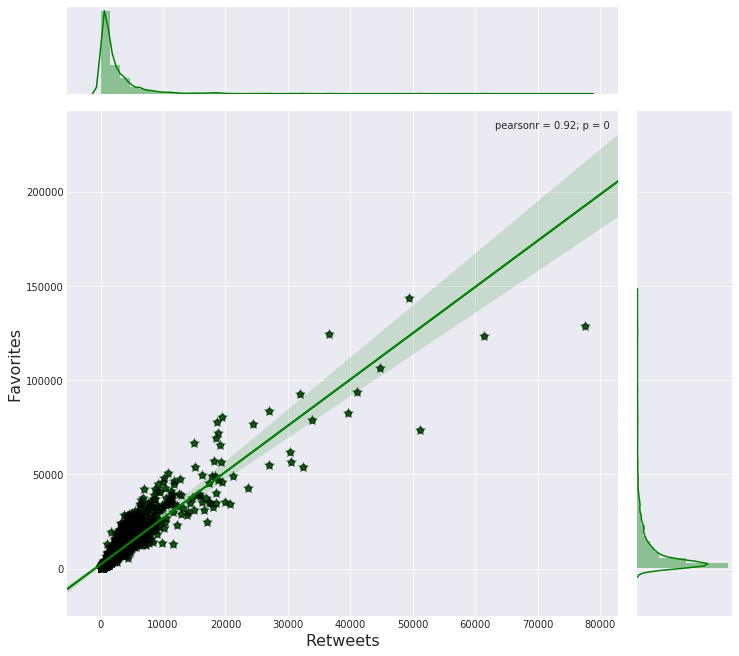

In [61]:
#Visualization comparing the favorite & retweet counts
sns.set_style('darkgrid')
g = sns.jointplot(x="retweets", 
                  y="favorites", 
                  data=df_master, 
                  color="green",
                  kind="reg", 
                  size=10)
g.plot_joint(plt.scatter,  
             c="black",
             s=100, 
             linewidth=1, 
             marker="*",
             alpha=0.45)
g.set_axis_labels("Retweets", "Favorites",fontsize=16)

g.fig.subplots_adjust(top=0.9)

In [62]:
df_master.corr()

,Unnamed: 0,tweet_id,rating,favorites,retweets,img_num,confidence
Unnamed: 0,1.000000,-0.950265,-0.033972,-0.580240,-0.382511,-0.231528,-0.158822
tweet_id,-0.950265,1.000000,0.029088,0.635685,0.399593,0.214205,0.146678
rating,-0.033972,0.029088,1.000000,0.022609,0.023528,0.000200,-0.021914
favorites,-0.580240,0.635685,0.022609,1.000000,0.917531,0.137388,0.078683
retweets,-0.382511,0.399593,0.023528,0.917531,1.000000,0.109100,0.032948
img_num,-0.231528,0.214205,0.000200,0.137388,0.109100,1.000000,0.139820
confidence,-0.158822,0.146678,-0.021914,0.078683,0.032948,0.139820,1.000000


More favorites than retweets with an upward trend

Several large outliers and extremely popular retweets

There is a strong positive relationship between favorites and retweets of 0.91. 

## Top Dog Breeds

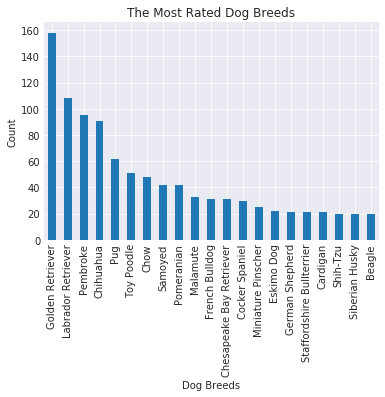

In [63]:
#Plot the top dog breeds with greater than or equal to 20
df_master.loc[df_master['breed'] == 'Unknown', 'breed'] = None
top = df_master.groupby('breed').filter(lambda x: len(x) >= 20)
top['breed'].value_counts().plot(kind = 'bar')
plt.title('The Most Rated Dog Breeds');
plt.xlabel('Dog Breeds');
plt.ylabel('Count');

Interesting to see that there are two types of retrievers in the top 2 which I assume most people own and are easily identifiable through neural networks 

In [64]:
top.groupby('breed')['rating'].describe()

,count,mean,std,min,25%,50%,75%,max
breed,,,,,,,,
Beagle,20.0,1.015000,0.153125,0.6,0.975,1.00,1.1,1.300000
Cardigan,21.0,1.114286,0.159015,0.7,1.000,1.10,1.2,1.300000
Chesapeake Bay Retriever,31.0,1.083871,0.143983,0.8,1.000,1.00,1.2,1.300000
Chihuahua,91.0,1.050949,0.209656,0.3,1.000,1.10,1.2,1.400000
Chow,48.0,1.141667,0.135007,0.7,1.100,1.20,1.2,1.300000
Cocker Spaniel,30.0,1.133333,0.118419,0.9,1.025,1.15,1.2,1.300000
Eskimo Dog,22.0,1.140909,0.140269,0.9,1.000,1.20,1.2,1.400000
French Bulldog,31.0,1.119355,0.179665,0.8,1.000,1.20,1.2,1.400000
German Shepherd,21.0,1.100000,0.144914,0.8,1.000,1.10,1.2,1.300000


From the statistics it looks like the higher the count of dog breeds the higher the average ratings which shows a positive correlation. But with Pomeranian and Golden Retriever having one the highest mean ratings is most likely as a result of the bigger outliers which skews the results up.